<h1 style="text-align: center;">Minería de Datos</h1>

<h2>Reporte Final</h2>

**Alumno:** Daniel Garnica Sánchez

**Matrícula:** 201735076

_**Índice**_

* **Introducción**
    * ¿Qué es PCA?
    * ¿Qué es un Ensamble?
* **Objetivos**
* **Desarrollo**
     * Pre-procesamiento de Datos
     * Estandarización de Datos
     * PCA
* **Clasificadores de Información**
     * Naive Bayes
     * Árbol de Decisión
     * KNN
* **Ensamble de Clasificadores**
    * Promedio de Predicciones
    * Método de Votación
* **Predicción y Resultados**
    * Visualización de la Información
    * Límites de Decisión
* **Conclusión**
* **Referencias**

# Introducción



A lo largo del curso se han ido explorando continuamente diferentes técnicas para la trata de información, tales como el pre-procesamiento de datos, donde se prepara la información para ser procesada con métodos como la estandarización de datos, la detección y eliminación de outliers, etc. 


De la misma manera se trabajó con el Análisis de Componentes Principales, para reducir la dimensionalidad de nuestra información.


Posteriormente se entrenaron diversos clasificadores, por lo que nuestro dataset se dividió en dos conjuntos, uno de entrenamiento y otro de prueba, para posteriormente entrenar y obtener la precisión cada clasificador. 


Finalmente se formó un ensamble con los clasificadores entrenados.

## ¿Qué es PCA?

El Análisis de Componentes Principales constituye un procedimiento matemático que permite transformar un número de variables posiblemente correlacionadas en un número menor de variables no correlacionadas, llamadas: **Componentes Principales.** El primer componente o eje absorbe la mayor cantidad de variabilidad posible del conjunto de datos y cada uno de los componentes restantes absorbe el resto. 

Básicamente el método genera un nuevo conjunto de variables, denominadas Componentes Principales, donde cada componente principal es una combinación lineal de las variables originales.

PCA es un método tradicionalmente utilizado para reducir la dimensionalidad de un conjunto de datos. También se utiliza para identificar nuevas variables en un conjunto de datos para una mejor interpretación de los mismos.

## ¿Qué es un Ensamble?

Como sabemos los clasificadores nos permiten hacer un análisis y una predicción de la clase de nuestra información. Un clasificador utiliza un conjunto de entrenamiento para comprender como los atributos se relacionan con las clases y una vez que ha sido entrenado puede utilizarse para detectar algún nuevo caso o hacer predicciones. 

Un ensamble es un conjunto de clasificadores que nos permite combinar múltiples hipótesis para formar una hipótesis mejor y más precisa. Básicamente los métodos de ensamble son técnicas que nos permiten combinar varios algoritmos de aprendizaje para construir un algoritmo más poderoso y por ende más preciso para obtener un mejor desempeño en la predicción.

# Objetivo

- Mostrar el proceso para la elaboración de un ensamble de clasificadores así como la visualización de la información y predicciones que este nos brinda.

# Desarrollo

A continuación se mostrará el proceso para la creación los clasificadores así como su entrenamiento y su precisión.

Nuestro dataset se conforma de uno de los archivos que se brindó para la prueba del proyecto final.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Markdown as md
%matplotlib inline

## Pre-procesamiento de Datos

Para obtener resultados más satisfactorios en nuestros clasificadores es necesario hacer un pre-procesamiento de nuestros datos por lo que se deberá obtener la información del archivo correspondiente para manipular los meta datos, haciendo énfasis en el numero elementos, atributos y clases.

In [2]:
info = 'cre300.txt'

with open(info, "r") as archivo:
    numElementos = int(archivo.readline())
    numAtributos = int(archivo.readline())
    numClases = int(archivo.readline())
    
    atributos = []
    
    for i in range(0, numAtributos):
        atributos.append("A" + str(i+1))

    atributos.append("Clase")
    
    data = pd.read_csv(archivo, delimiter=',', header=None)
    data.columns = atributos

### Información Dataset

Tras indicar el archivo que deseamos pre-procesar, obtenemos el numero de elementos, atributos y clases para posteriormente ver una pequeña parte de nuestro dataset

In [3]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A142,A143,A144,A145,A146,A147,A148,A149,A150,Clase
0,0.80,0.97,0.13,0.11,0.16,0.33,0.12,0.69,0.64,0.04,...,0.15,0.33,0.28,0.02,0.24,0.86,0.71,0.23,0.96,0
1,0.66,0.26,0.69,0.17,0.59,0.73,0.53,0.91,0.82,0.30,...,0.41,0.50,0.58,0.57,0.98,0.58,0.77,0.04,0.81,2
2,0.60,0.97,0.36,0.49,0.96,0.50,0.97,0.25,0.90,0.46,...,0.61,0.44,0.42,0.20,0.50,0.73,0.79,0.39,0.11,2
3,0.82,0.96,0.12,0.11,0.15,0.33,0.13,0.70,0.64,0.05,...,0.14,0.33,0.29,0.02,0.24,0.85,0.70,0.24,0.95,0
4,0.54,0.21,0.06,0.86,0.89,0.91,0.92,0.71,0.11,0.91,...,0.41,0.85,0.81,0.29,0.79,0.81,0.84,0.30,0.82,0


### Estandarización de Datos

Dado que posteriormente utilizaremos el método de PCA el cual produce un subespacio de características que maximiza la varianza a lo largo de los ejes, tiene sentido estandarizar los datos, especialmente si se midieron en diferentes escalas.

A continuación se dividirá la información en dos conjuntos, el de las clases y el de la información, esto para poder estandarizar la información sin tomar en cuenta la clase del elemento.

In [4]:
dataNoClase = data.drop('Clase', 1)
y_final = data['Clase']

x_std = StandardScaler().fit_transform(dataNoClase)
atributos.remove('Clase')

x_final = pd.DataFrame(data = x_std, columns = atributos)

### Visualización de Información Estandarizada

A continuación visualizaremos la información estandarizada, podemos notar un cambio en los valores de los atributos.

In [5]:
x_final.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A141,A142,A143,A144,A145,A146,A147,A148,A149,A150
0,0.957804,1.430093,-0.964604,-1.460304,-1.195951,-0.643948,-1.582003,0.817923,0.501322,-1.497822,...,-0.393159,-1.199497,-0.880184,-0.610978,-1.568219,-0.618595,0.947442,0.605907,-0.629173,1.197360
1,0.414992,-0.812818,0.947081,-1.270517,0.278133,0.858848,-0.071005,1.508594,1.175242,-0.666054,...,1.155042,-0.382158,-0.285071,0.497428,0.274248,1.506239,-0.111857,0.818879,-1.318445,0.649954
2,0.182359,1.430093,-0.179448,-0.258321,1.546531,-0.005260,1.550554,-0.563421,1.474763,-0.154197,...,1.692173,0.246564,-0.495111,-0.093722,-0.965230,0.127969,0.455625,0.889870,-0.048733,-1.904609
3,1.035348,1.398503,-0.998742,-1.460304,-1.230232,-0.643948,-1.545149,0.849317,0.501322,-1.465831,...,-0.329967,-1.230933,-0.880184,-0.574031,-1.568219,-0.618595,0.909610,0.570411,-0.592895,1.160866
4,-0.050275,-0.970770,-1.203565,0.912031,1.306564,1.535107,1.366286,0.880711,-1.482999,1.285401,...,-1.246249,-0.382158,0.940162,1.347207,-0.663735,0.960674,0.758281,1.067347,-0.375230,0.686447


## PCA

Tras haber estandarizado nuestro dataset podemos proceder a realizar PCA, donde indicaremos el numero de componentes que deseamos, para posteriormente visualizar el contenido de estos. 

Se optó por utilizar el Análisis de Componentes Principales debido a la gran cantidad de atributos que nuestros elementos tienen, además de proporcionar más precisión a nuestros clasificadores.

In [6]:
num_comp = int(input("Ingrese la cantidad de Componentes Principales: "))
pca = PCA(n_components = num_comp)

Ingrese la cantidad de Componentes Principales: 2


In [7]:
atributos = []
for i in range(num_comp):
    atributos.append('CP'+ str(i+1))

In [8]:
atributos

['CP1', 'CP2']

In [9]:
x_pca = pca.fit_transform(x_std)
x_final = pd.DataFrame(data = x_pca, columns = atributos)

### Visualización de Componentes Principales

Tras haber aplicado PCA en nuestro dataset, podemos ver el numero de componentes principales mostrándonos como las dimensiones han sido reducidas.

In [10]:
x_final.head()

,CP1,CP2
0,-7.284268,4.459476
1,-3.256810,-4.594693
2,-3.657402,-2.966895
3,-7.264275,4.448198
4,4.063262,-3.741597


# Clasificadores de Información

In [11]:
dataFinal = pd.concat([x_final, y_final], axis = 1);
X = x_final
Y = y_final

Para entrenar los diversos clasificadores es necesario dividir nuestra información ya limpia y estandarizada en dos conjuntos:

- Conjunto de entrenamiento
- Conjunto de prueba

Por lo que nos auxiliaremos con el método **train_test_split** que dividirá nuestra información en estos conjuntos. Este método nos permite determinar la proporción en la que podemos dividir nuestra información, sin embargo la dejaremos en su valor por defecto que es 0.25

In [12]:
import seaborn as sn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

## Naive Bayes

Naive Bayes es un clasificador probabilístico inspirado en el teorema de Bayes bajo una simple suposición de que los atributos son condicionalmente independientes.

Naive Bayes es un algoritmo muy simple de implementar y se han obtenido buenos resultados en la mayoría de los casos. Puede ser fácilmente escalable a conjuntos de datos más grandes, ya que lleva tiempo lineal, en lugar de una aproximación iterativa costosa como se usa para muchos otros tipos de clasificadores.

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf_bayes = GaussianNB().fit(X_train, y_train)
bayes_pred = clf_bayes.predict(X_test)

### Reporte de Clasificación

In [14]:
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.80      0.53      0.64        15
           2       0.67      0.60      0.63        20
           3       0.39      0.67      0.49        18

    accuracy                           0.59        75
   macro avg       0.65      0.59      0.60        75
weighted avg       0.65      0.59      0.60        75



### Matríz de Confusión 

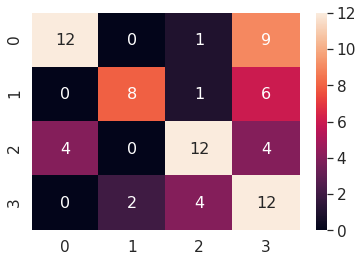

In [15]:
array_bayes = confusion_matrix(y_test, bayes_pred)
index = array_bayes.shape[0]
columns = array_bayes.shape[1]
         
df_cm = pd.DataFrame(array_bayes, range(index), range(columns))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Precisión de Clasificador Naive Bayes

In [16]:
print(accuracy_score(y_test, bayes_pred))

0.5866666666666667


Podemos notar como la precisión de nuestro clasificador no es del todo optima, sin embargo veremos como se compara esta precisión con la de los demás clasificadores.

## Árbol de Decisión

El árbol de decisión crea modelos de clasificación en forma de estructura de árbol. Utiliza un conjunto de reglas las cuales son exclusivas y exhaustivas para la clasificación.


Este tipo de clasificador puede ajustarse fácilmente generando demasiadas ramas y puede reflejar anomalías debidas al ruido o valores atípicos (outliers). Un modelo sobre ajustado tiene un rendimiento muy pobre en los datos no vistos a pesar de que ofrece un rendimiento impresionante en los datos de entrenamiento. Esto se puede evitar mediante la poda, la cual es un proceso que elimina las ramas del árbol para una mejor clasificación de los elementos, sin embargo este proceso no se aplico en el respectivo clasificador.

In [17]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
tree_pred = clf_tree.predict(X_test)

### Reporte de Clasificación

In [18]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.81      0.87      0.84        15
           2       1.00      0.90      0.95        20
           3       0.80      0.89      0.84        18

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



### Matríz de Confusión 

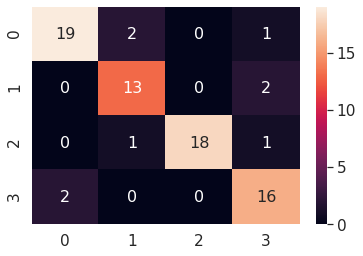

In [19]:
array_tree = confusion_matrix(y_test, tree_pred)
index = array_tree.shape[0]
columns = array_tree.shape[1]
         
df_cm = pd.DataFrame(array_tree, range(index), range(columns))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Precisión de Clasificador Arbol

In [20]:
print(accuracy_score(y_test, tree_pred))

0.88


Podemos notar que a diferencia del clasificador Naive Bayes se obtuvo una mayor precisión incluso sin utilizar el procedimiento de poda de árbol. Así mismo la diferencia de precisión entre ambos clasificadores es considerable.

## K-Nearest Neighbors

k-Nearest Neighbors por sus siglas KNN es un algoritmo de aprendizaje lento que almacena todas las instancias correspondientes a puntos de datos de entrenamiento en espacio n-dimensional. Cuando se reciben datos discretos desconocidos, analiza el número k más cercano de instancias guardadas también identificados como: "vecinos más cercanos" y devuelve la clase más común como la predicción y para los datos con valor real devuelve la media de k vecinos más cercanos.

**Observación**

Es importante mencionar que la precisión de este algoritmo es inversamente proporcional al número K de vecinos cercanos. Esto quiere decir que mientras el valor de K se vea incrementado, la precisión de este clasificador se verá disminuida como se muestra en la siguiente gráfica.

Es por esta razón que si deseamos una mejor precisión es recomendable que K tenga un valor igual o menor a 5

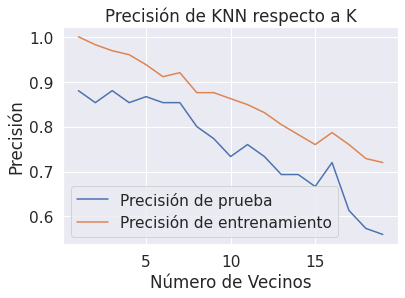

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 
    
plt.title('Precisión de KNN respecto a K')
plt.plot(neighbors, test_accuracy, label='Precisión de prueba')
plt.plot(neighbors, train_accuracy, label='Precisión de entrenamiento')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Precisión')
plt.show()

In [22]:
num_vecinos = int(input("Numero de Vecinos K = "))
clf_knn = KNeighborsClassifier(n_neighbors = num_vecinos)
clf_knn.fit(X_train, y_train)
knn_pred = clf_knn.predict(X_test)

Numero de Vecinos K = 5


### Reporte de Clasificación

In [23]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.76      0.87      0.81        15
           2       0.90      0.90      0.90        20
           3       0.84      0.89      0.86        18

    accuracy                           0.87        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.87      0.87      0.87        75



### Matríz de Confusión 

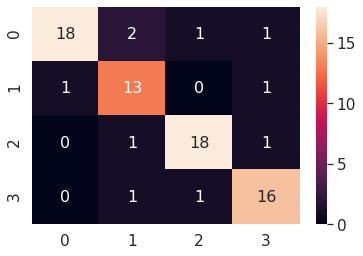

In [24]:
array_knn = confusion_matrix(y_test, knn_pred)
index = array_knn.shape[0]
columns = array_knn.shape[1]
         
df_cm = pd.DataFrame(array_knn, range(index), range(columns))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Precisión de Clasificador KNN

In [25]:
print(accuracy_score(y_test, knn_pred))

0.8666666666666667


Podemos notar que de los tres clasificadores seleccionados KNN es el que normalmente obtiene un mayor grado de precisión para determinar la clase de los elementos en nuestro dataset, esto es aún más evidente si observamos la matriz de confusión, donde únicamente comete unos cuántos errores, por lo que podemos observar la eficiencia de este algoritmo en el caso particular don de K equivale al valor ingresado por el usuario.

# Ensamble de Clasificadores

Como se mencionó anteriormente, un ensamble es un conjunto de clasificadores que nos permite combinar múltiples hipótesis para formar una hipótesis mejor y más precisa, esto nos permitirá tener una predicción mas certera. 

Existen varios métodos de ensamble, entre los más conocidos y utilizados se encuentran los siguientes:

* **Bagging:** Mejora la estabilidad y precisión de algoritmos de aprendizaje automático
* **Adaboost:** Propone entrenar iterativamente una serie de clasificadores base, de tal modo que cada nuevo clasificador preste mayor atención a los datos clasificados erróneamente por los clasificadores anteriores
* **Random Forest:** Este método se encarga de crear y combinar diversos árboles haciendo que trabajen en conjunto de tal manera que la salida de cada uno se contará como "un voto" y la opción más votada será la respuesta del "Random Forest"

En nuestro caso particular nos enfocaremos en el método de votación. Este método toma una lista de diferentes estimadores como argumentos y un método de votación, ya sea una votación **dura** o **suave.** 
El método de votación **dura** utiliza las etiquetas predichas y un sistema de reglas por mayoría, mientras que el método de votación **suave** predice las etiquetas de clase en función de las probabilidades predichas para el clasificador.

## Promedio de Predicciones

Antes de entrar al clasificador de votación, cubramos un método muy rápido y fácil el cual se basa en el promedio de las predicciones. Simplemente sumamos los diferentes valores obtenidos de nuestros clasificadores elegidos y luego los dividimos por el número total de clasificadores, usando la división de piso para obtener un valor completo.

In [26]:
avg_preds = (knn_pred + tree_pred + bayes_pred)//3
acc = accuracy_score(y_test, avg_preds)
print("Promedio de Clasificadores: " + str(acc))

Promedio de Clasificadores: 0.64


Podemos notar que guardamos con antelación las predicciones de los clasificadores en variables individuales para posteriormente utilizar esos valores.

## Método de Votación

Creamos nuestro clasificador de votación a partir de los clasificadores KNN, Bayes y Árbol de Decisión mostrados anteriormente y se determina el tipo de votación, el cual en nuestro caso será una votación suave.
Al igual que con los clasificadores anteriores se le brindarán datos de entrenamiento para posteriormente hacer una predicción

In [27]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators= [('Bayes', clf_bayes), ('Tree', clf_tree), ('KNN', clf_knn)], voting='soft', weights=[1, 1, 2])

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('Tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                

Podemos notar como nuestro ensamble describe las características especificas de cada clasificador con el que está trabajando.

Posteriormente se calcula la precisión de predicción de nuestro ensamble

# Predicción y Resultados Finales

In [28]:
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)

print("Precisión: " + str(acc))

Precisión: 0.8533333333333334


## Visualización de la Información

### Reporte de Clasificación

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.81      0.87      0.84        15
           2       0.95      0.90      0.92        20
           3       0.78      0.78      0.78        18

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75



### Matríz de Confusión 

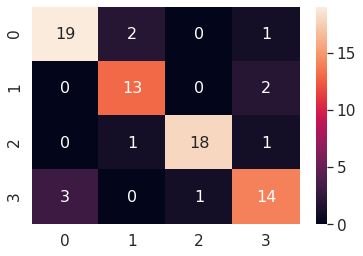

In [30]:
array = confusion_matrix(y_test, preds)
index = array.shape[0]
columns = array.shape[1]
         
df_cm = pd.DataFrame(array, range(index), range(columns))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

## Límites de Decisión

En problemas de clasificación, la predicción de una clase está involucrada entre múltiples clases. En otras palabras, la predicción se puede enmarcar de una manera en que una instancia debe mantenerse debajo de una región particular (que significa la clase) y necesita separarse de otras regiones. Esta separación de otras regiones se puede visualizar mediante un límite conocido como **Límite de decisión**. Esta visualización del Límite de decisión en el espacio de características se realiza en una Gráfica de dispersión, donde cada punto representa un punto de datos de nuestro conjunto de datos y de la misma manera ejes que representan las características. El límite de decisión separa los puntos de datos en regiones, que en realidad son las clases a las que pertenecen.

**Observación**

Para que esta visualización sea posible es necesario que las características se encuentren un un plano bidimensional, por lo que en nuestro caso particular si se decide trabajar con dos o mas componentes principales no nos será posible ver los límites de decisión. 

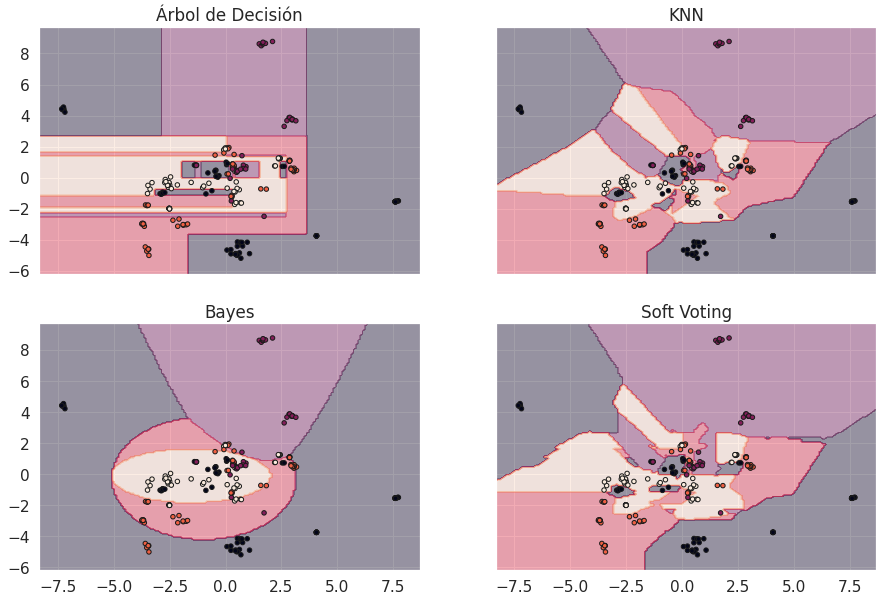

In [31]:
if (num_comp == 2):
    X = np.array(X_train)
    y = np.array(y_train)

    # Plotting decision regions
    from itertools import product
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 10))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf_tree, clf_knn, clf_bayes, voting_clf],
                            ['Árbol de Decisión', 'KNN',
                             'Bayes', 'Soft Voting']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

# Conclusión

Tras haber experimentado con los distintos tipos de clasificadores se pudo observar que estos varían en su desempeño y por en de en su precisión para determinar la clase de algún elemento, esto nos permite deducir el por que de los métodos de ensamble, al utilizar diferentes algoritmos de clasificación en conjunto nos permite obtener un mejor desempeño en la predicción, algo que sería distinto de manera individual.

El método de ensamble por votación es un uno de los métodos más populares y como podemos ver es un método más complejo a diferencia de un promedio simple de los resultados de clasificación, ya que como podemos apreciar, su precisión es más elevada y por lo tanto más óptima. El ensamble nos permite obtener una mejor predicción, combinando diferentes clasificadores para obtener datos más precisos. 

De esta manera se logró el objetivo del proyecto, el cual involucraba la experimentación con los distintos clasificadores con el fin de observar las diferencias que tienen entre sí, así como encontrar el razonamiento de tras del uso de métodos de ensamble.

A lo largo del curso se vieron distintos temas respecto a la materia de Minería de Datos, entre los cuales se encontraban temas como: Ensambles, Redes Bayesianas, Redes Multicapa, etc. Los cuales de manera teórica proporcionaban mucho conocimiento, sin embargo no fue hasta la implementación de este proyecto que el conocimiento adquirido brindo frutos así como un entendimiento mas profundo de los temas. 

# Referencias

* Asiri, S. (2018, June 11). Machine Learning Classifiers. Retrieved from https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623

* Chakrabarty, N. (2019, October 12). Decision Boundary Visualization(A-Z). Retrieved from https://towardsdatascience.com/decision-boundary-visualization-a-z-6a63ae9cca7d

* Galarnyk, M. (2020, May 1). PCA using Python (scikit-learn). Retrieved from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

* Li, S. (2017, December 6). Solving A Simple Classification Problem with Python - Fruits Lovers' Edition. Retrieved from https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

* Nair, P. (2019, June 12). Hands-on : Outlier Detection and Treatment in Python Using 1.5 IQR rule. Retrieved from https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

* Navlani, A. (2018, December 28). Decision Tree Classification in Python. Retrieved from https://www.datacamp.com/community/tutorials/decision-tree-classification-python

*  González, L. (2019, July 2). Creando un clasificador para la flor Iris con Python. Retrieved from https://ligdigonzalez.com/machine-learning-clasificador-flor-iris-python/